In [1]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from statistics import mean, median, mode

In [2]:
df_train = pd.read_csv(f'../../../code-mixed-enta/dc_fire/tamil_train.tsv', sep='\t')
df_train.head()

,text,category
0,Trailer late ah parthavanga like podunga,Positive
1,Move pathutu vanthu trailer pakurvnga yaru,Positive
2,Puthupetai dhanush ah yarellam pathinga,Positive
3,"Dhanush oda character ,puthu sa erukay , mass ta",Positive
4,vera level ippa pesungada mokka nu thalaivaaaaaa,Positive


In [3]:
df_train.shape

(11335, 2)

In [4]:
df_dev = pd.read_csv(f'../../../code-mixed-enta/dc_fire/tamil_dev.tsv', sep='\t')
df_dev.head()

,text,category
0,Daily likes & views pakka vanthavaga ellaruku...,Positive
1,25 k dislikes ethuku da intha trailerku poi a...,Negative
2,#Lyca unna nenacha pavama iruku ya,Mixed_feelings
3,It looks like Hindi movie amitab bachan,Positive
4,Thalaivarukku nejamavey vayasaagiduchu... siv...,Positive


In [5]:
df_dev.shape

(1260, 2)

In [6]:
df_test = pd.read_csv(f'../../../code-mixed-enta/dc_fire/tamil_test.tsv', sep='\t')
df_test.head()

,id,text
0,ta_sent_1,Yarayellam FDFS ppga ippove ready agitinga
1,ta_sent_2,Ennada viswasam mersal sarkar madhri time la l...
2,ta_sent_3,yuvan vera level ya .... valuable script. SK i...
3,ta_sent_4,70 vayasulayum thanoda rasigargala sandhosapad...
4,ta_sent_5,all the best anna...Telugu makkal selvan fans


In [7]:
df_test.shape

(3149, 2)

In [8]:
import unicodedata as ud

latin_letters= {}

def is_latin(uchr):
    try: return latin_letters[uchr]
    except KeyError:
         return latin_letters.setdefault(uchr, 'LATIN' in ud.name(uchr))

def only_roman_chars(unistr):
    return all(is_latin(uchr)
           for uchr in unistr
           if uchr.isalpha()) # isalpha suggested by John Machin

In [9]:
count = 0
for index, row in df_train.iterrows():
    if not only_roman_chars(row['text']):
        print(index, row['text'], row['category'])
        print('\n\n')
        count += 1
print(1 - count/len(df_train))

41  சுயமாக சிந்திக்க தெரிஞ்சவன் தான் சூப்பர் ஹீரோ' - 100% true in the age information abundance and mass distractions. Positive 



250  Last dailog புரிஞ்சா inga like podunga Positive 



271  எத்தன HATTERS dislike pannunalum asuran movie kku award confirm by:PURE DHANUSH ANNA FAN Positive 



273  தல i am waiting for nerkoonda paarvai Positive 



308  మొబైల్స్ మాత్రమే అలా హఠాత్తుగా మాయం అవడం ప్రేక్షకుల మనసులోకి నొప్పేలా లేదు.ఈ విషయంలో మెస్మరైజ్ మిస్సయ్యింది. not-Tamil 



410  തല അജിത് kerala fans like here not-Tamil 



413  1.5M views in 60min அம்மோவ் Positive 



429  Not bad........... Any way karthik flop agama.. Iruka...... வாழ்த்துக்கள் Mixed_feelings 



568  luv u ರಜನಿ... luv from Karnataka not-Tamil 



609  ಜಜಠಷಬ ಜಗಳ ಡಬ್ಬ ಜೇನು ರುಚಿ ಖ ಉಜ್ಟ್ಚಿ ಖ್ಠಿಞ್ಝ ಉಜ್ಟ್ಚಿ ಛಿಜ ಖ್ಠಿಞ್ಝ ಈ #nkp ಬಠಪಢಝ ಜಂಅಂಇ ಋಋ ಡಘಫಫಝ ಡಝಫಷ ಢಘಟಗಙಬಷಢ not-Tamil 



718  Chiyyan sir.  మూవీ ట్రైలర్ అదుర్స్   Rombbha nalla irikke  Rommbha santhosham sir Positive 



956  Pakkka masss #2.0 Vera level #தலைவா 🤘🤘🤘🤘 Mixe

7920  தல போல வராது.... Waiting viswasam trailer Mixed_feelings 



8025  द बेस्ट द बेस्ट द बेस्ट ऑफ बेस्ट not-Tamil 



8043  Most like pottavanalam namma சொட்டபதி பேன்ஸ்  than , Negative 



8135  Double Agent,  C Vik &  ലെന Positive 



8191  எம்ஜிஆர் பெயர் batch la iruku Yarellam pathinga unknown_state 



8240  Adadaaaa daaaaa.... Superrrrrr... Marana mass... Plz ரஞ்சித் direction enimel venam Mixed_feelings 



8421  Any one After #PSPK26 🤘 మాకు మా దేవుడు స్క్రీన్ మీద కనపడితేచాలు not-Tamil 



8518  thank u so much , ennoda 2 thalaivargalaiyum onna pakkurathukku  மகிழ்ச்சி Mixed_feelings 



8625  అన్నయ్య.... తెలుగు లో కూడా చేయండి అన్నయ్య... మూవీస్ ప్లీజ్ అన్నయ్య not-Tamil 



8810  Rekka part 2 va illama irundha, மகிழ்ச்சி Mixed_feelings 



8919  That #BGM... Raja Raja தான் #u1 Mixed_feelings 



8948  Pongalu-ku oru sweet box parcel............. சிறப்பான, தரமான Trailer..... Positive 



8986  பவர்கட் இனி இல்லை!\r Sijlee energy solutions pvt ltd\r sijlee.com\r 044-48684268,97890

In [10]:
count = 0
for index, row in df_dev.iterrows():
    if not only_roman_chars(row['text']):
        print(index, row['text'], row['category'])
        print('\n\n')
        count += 1
print(1 - count/len(df_dev))

12  பவர்கட் இனி இல்லை!\r Sijlee energy solutions pvt ltd\r sijlee.com\r 044-48684268,9789082241\r Emi available\r Chennai Positive 



30  ਪੱਟੇਟੋ ਦਾ ਸੱਬਜੀ ਸੈਂਨੂ ਵਿਚ ਬੋਤੇ ਪਿਆਰਾ ਲਗਦਾ..।। not-Tamil 



38  ನಮ್ಮ ಕರ್ನಾಟಕದ ರಜನೀಕಾಂತ್ ಅವರಿಗೋಸ್ಕರ ನಮ್ಮ ಹಾಜರಿ... ನಮ್ಮ ಕನ್ನಡದವರು ಎಷ್ಟು ಮಂದಿ ಇದೀರ್ಪಾ!? not-Tamil 



95  Chiyan விக்ரமோட   fans lam like button ah adichi thookunga paaklaamm........ Positive 



182  Mokka mokka mokka trailer டா அஜித் fans பாவம் டா Negative 



188  Thalaiva പടം അടിപൊളി Fan from Kerala not-Tamil 



321  Nellai chiyaan Vikram veriyargal Vara level Thalaiva chiyaan Vikram பக்கா மாஸ் கோல மாஸ் I am writing Your movie Positive 



351  Goosebumps at 1:40 awesome மாஸ் look my தல Positive 



381  పెట్ట తెలుగు trailer కోసం ఎంత మంది wait చేస్తున్నారు Super star  రజనీకాంత్ తెలుగు ఫాన్స్ ఓక లైక్ వేయండి not-Tamil 



418  தல அஜித் 60 movieku   Evlo per wait panrega.?? Positive 



467  мaѕѕ  waιтιng ғor  ԹҽԵԵɑ Positive 



510  శ్రీహరి నటించిన శ్రీలక్ష్మి మూవీ రిమేక్ లాగా ఉంది. not

In [12]:
count = 0
for index, row in df_test.iterrows():
    if not only_roman_chars(row['text']):
        print(index, row['text'])
        print('\n\n')
        count += 1
print(1 - count/len(df_test))

41 #Nerkondaparvai padam citizen,vidhi  padathirkku piragu oru arumayana  Court scene ah irukkumunnunnu  பட்சிசொல்லுது



161 അസധോമ സദ്ഗമയാ .thala adv.lal Krishna is loading..



310 ѕєmα thαlαívααααα í lσvє чσu ѕírαpαnα.....thαrαmαnα.... pαdαm.....pσngαl .....fєѕtívαl ......



382 Sirappana tharamaana sambavangala இனிமேல் தான் பாக்கல porom



411 அடேங்கப்பா THALA speech ketukitte erukkanum pola erukku



455 entha ,gethu  mass   yarukuda ,varum   thalaivar ku ,mattum athu  sothu மாஸ் காட்டுறதுல கெத்து, DD boys  CH 6



537 ಅಖಿಲ ಕರ್ನಾಟಕ ದರ್ಶನ್-ಸುದೀಪ್  ಅಭಿಮಾನಿಗಳ ಕಡೆಯಿಂದ ಈ ಬೆಸ್ಟ್ Wishing Thala Ajith Anna



545 சீக்கிரமா viswassam trailer vidunga pa....



582 પેટ્ટા પરા્ક ....  સુપર સ્ટાર રજીનીકાંત 🤘



626 Verithanam verithanam verithanam mukiyama salt and pepper hair marana mass vikram sir Ungaluku matum tha நல்லா iruku



771 Trailer ivlo nalla irukunna , கண்டிப்பா U1 music ah kanna muditu kelunga Vera level



779 ಕೆಲ್ಗಡೆ ಅಷ್ಟೊಂದ್ ಜನ ಇದ್ದಾರೆ ನೀನ್ ಯೆಂಗ್ ಮೆಲ್ಬಂದೆ.ಅದನ್ನ ಹೋಗಿ ಕೆಲ್ಗಾಡೆ 

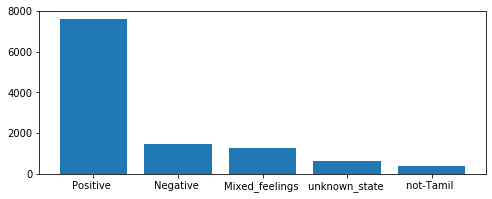

In [13]:
# Class distribution in training set
D = Counter(df_train['category'])
plt.rcParams["figure.figsize"] = (8,3)
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

In [14]:
# Min, Max, Avg no of sentences per class in Training set
print('Min no. of sentences: ', min(D.values()))
print('Max no. of sentences: ', max(D.values()))
print('Avg no. of sentences: ', mean(D.values()))
print('Median of sentences: ', median(D.values()))

Min no. of sentences:  368
Max no. of sentences:  7627
Avg no. of sentences:  2267
Median of sentences:  1283


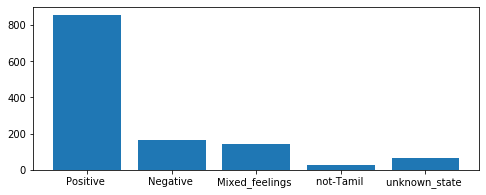

In [15]:
# Class distribution in dev set
D = Counter(df_dev['category'])
plt.rcParams["figure.figsize"] = (8,3)
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

In [32]:
# Min, Max, Avg no of sentences per class in Dev set
print('Min no. of sentences: ', min(D.values()))
print('Max no. of sentences: ', max(D.values()))
print('Avg no. of sentences: ', mean(D.values()))
print('Median of sentences: ', median(D.values()))

Min no. of sentences:  29
Max no. of sentences:  857
Avg no. of sentences:  252
Median of sentences:  141


In [16]:
def tokenize(s: str):
    return s.split()

In [17]:
# variation in length of sentences in train set
len_of_tokens = []
for index, row in df_train.iterrows():
    tokens = tokenize((row['text']).lower())
    len_of_tokens.append(len(tokens))
print('Min no. of tokens: ', min(len_of_tokens))
print('Max no. of tokens: ', max(len_of_tokens))
print('Avg no. of tokens: ', mean(len_of_tokens))
print('Median of no. of tokens: ', median(len_of_tokens))

Min no. of tokens:  1
Max no. of tokens:  23
Avg no. of tokens:  8.643758270842524
Median of no. of tokens:  8


In [18]:
# variation in length of sentences in dev set
len_of_tokens = []
for index, row in df_dev.iterrows():
    tokens = tokenize((row['text']).lower())
    len_of_tokens.append(len(tokens))
print('Min no. of tokens: ', min(len_of_tokens))
print('Max no. of tokens: ', max(len_of_tokens))
print('Avg no. of tokens: ', mean(len_of_tokens))
print('Median of no. of tokens: ', median(len_of_tokens))

Min no. of tokens:  2
Max no. of tokens:  21
Avg no. of tokens:  8.834920634920636
Median of no. of tokens:  8.0


In [19]:
# variation in length of sentences in test set
len_of_tokens = []
for index, row in df_test.iterrows():
    tokens = tokenize((row['text']).lower())
    len_of_tokens.append(len(tokens))
print('Min no. of tokens: ', min(len_of_tokens))
print('Max no. of tokens: ', max(len_of_tokens))
print('Avg no. of tokens: ', mean(len_of_tokens))
print('Median of no. of tokens: ', median(len_of_tokens))

Min no. of tokens:  1
Max no. of tokens:  25
Avg no. of tokens:  8.614480787551603
Median of no. of tokens:  8
